## Data loading

Load the dataset "HSN_SAC.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('HSN_SAC.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'HSN_SAC.xlsx' not found. Please ensure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,\nHSNCode,Description
0,01,LIVE ANIMALS
1,0101,"LIVE HORSES, ASSES, MULES AND HINNIES."
2,01011010,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE..."
3,01011020,"LIVE HORSES, ASSES, MULESANDHINNIES PURE-BRED ..."
4,01011090,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE..."


(21568, 2)


## Data exploration

Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining data types, missing values, descriptive statistics, and potential inconsistencies.



In [ ]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Descriptive statistics
print("\nDescriptive Statistics for HSN Code:\n", df['\nHSNCode'].describe())
print("\nUnique Values and Frequencies of Description:\n", df['Description'].value_counts())

# Identify potential inconsistencies
print("\nNumber of unique HSN Codes:", df['\nHSNCode'].nunique())
print("\nFirst few unique HSN Codes:", df['\nHSNCode'].unique()[:10]) # Inspect a few unique values

#Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

Data Types:
 \nHSNCode      object
Description    object
dtype: object

Missing Values:
 \nHSNCode      0
Description    1
dtype: int64

Percentage of Missing Values:
 \nHSNCode      0.000000
Description    0.004636
dtype: float64

Descriptive Statistics for HSN Code:
 count        21568
unique       21568
top       98020000
freq             1
Name: \nHSNCode, dtype: object

Unique Values and Frequencies of Description:
 Description
OTHER                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

**Reasoning**:
The previous code block provided a good overview. Now, I will investigate the single missing value in the 'Description' column and check the HSN Code associated with it, as well as look into the duplicated rows to better understand the data.



In [ ]:
# Investigate the missing value in 'Description'
missing_description = df[df['Description'].isnull()]
print("\nRow with missing description:\n", missing_description)

#Check the HSN Code of the duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
print("\nDuplicated Rows:\n", duplicated_rows)


Row with missing description:
       \nHSNCode Description
10599  52083110         NaN

Duplicated Rows:
 Empty DataFrame
Columns: [
HSNCode, Description]
Index: []


## Data analysis


Analyze the data to gain deeper insights.


**Reasoning**:
Analyze the frequency distribution of HSN Codes, identify the top 10 most frequent ones, and visualize this distribution. Also, investigate the descriptions associated with these codes.



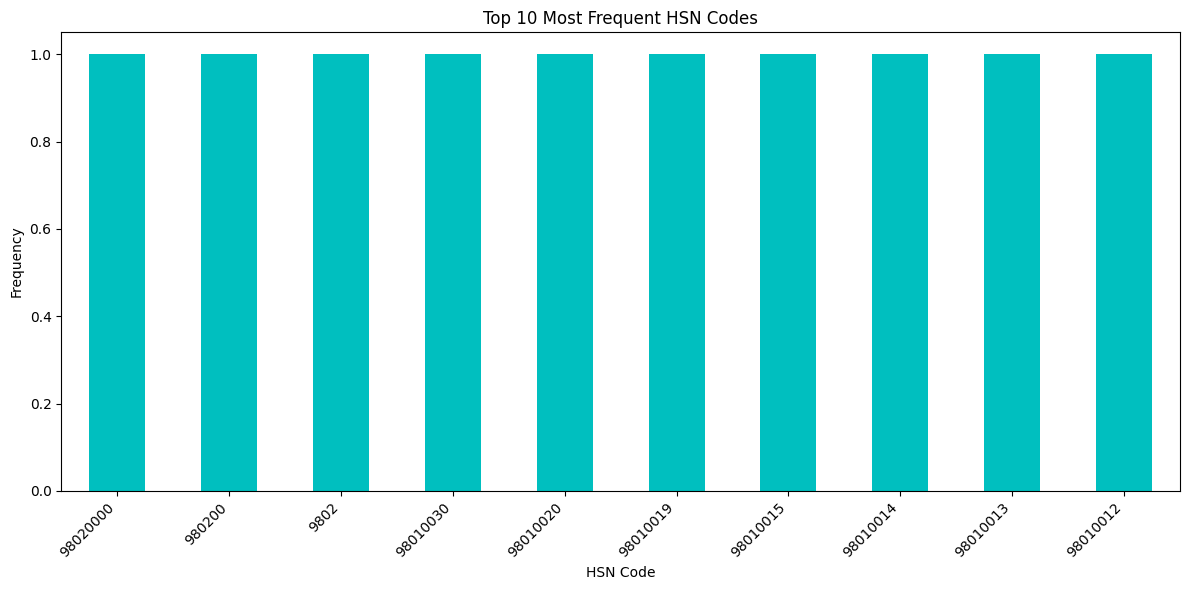

HSN Code: 98020000, Descriptions: ['LABORATORY CHEMICALS']
HSN Code: 980200, Descriptions: ['LABORATORY CHEMICALS']
HSN Code: 9802, Descriptions: ['LABORATORY CHEMICALS']
HSN Code: 98010030, Descriptions: ['Spare parts and other raw materials (including semi-finished materials or consumable stores for the maintenance of plant or project']
HSN Code: 98010020, Descriptions: ['Components (whether or not finished or not) or raw materials for the manufacture of aforesaid items required for the initial setting up of a unit or the substantial expansion of a unit']
HSN Code: 98010019, Descriptions: ['FOR OTHER PROJECTS, OTHER THAN SOLAR POWER PLANT OR SOLAR POWER PROJECT']
HSN Code: 98010015, Descriptions: ['Project for exploration of oil or other minerals']
HSN Code: 98010014, Descriptions: ['For mining project']
HSN Code: 98010013, Descriptions: ['FOR POWER PROJECT, OTHER THAN SOLAR POWER PLANT OR SOLAR POWER PROJECT']
HSN Code: 98010012, Descriptions: ['For irrigation plant']


In [ ]:
import matplotlib.pyplot as plt

# Analyze the frequency distribution of HSN Codes
hsn_code_counts = df['\nHSNCode'].value_counts()

# Determine the top 10 most frequent HSN codes
top_10_hsn_codes = hsn_code_counts.head(10)

# Visualize the distribution
plt.figure(figsize=(12, 6))
top_10_hsn_codes.plot(kind='bar', color='c')
plt.title('Top 10 Most Frequent HSN Codes')
plt.xlabel('HSN Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Investigate descriptions associated with the most frequent HSN codes
for hsn_code in top_10_hsn_codes.index:
    descriptions = df[df['\nHSNCode'] == hsn_code]['Description'].unique()
    print(f"HSN Code: {hsn_code}, Descriptions: {descriptions}")

**Reasoning**:
Explore the relationship between the length of the HSN Code and its corresponding description. Calculate the average length of descriptions for different HSN code lengths and identify potential outliers or anomalies.



**Reasoning**:
The previous code block failed due to a syntax error in the f-string.  I will correct the error by removing the backslash from the column name `\nHSNCode` within the f-string.  I will also improve the outlier detection by using the Interquartile Range (IQR) method, which is generally more robust to extreme values than the standard deviation method.



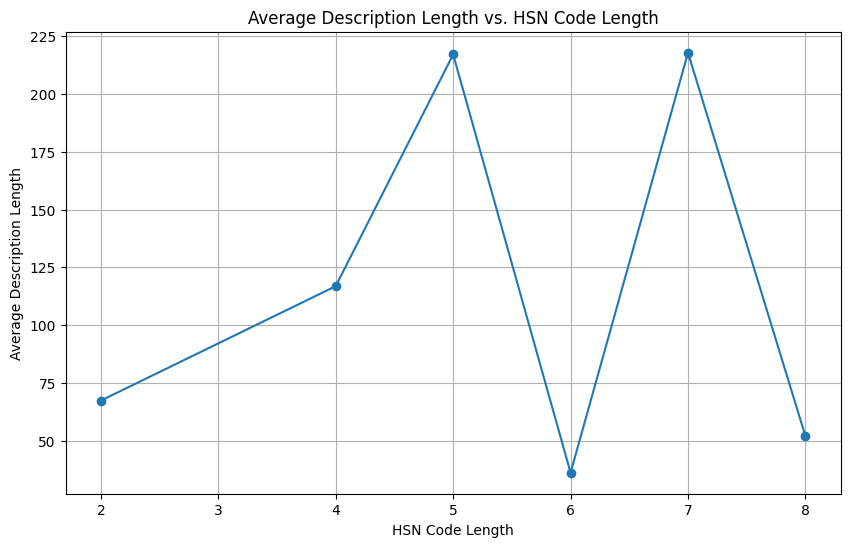

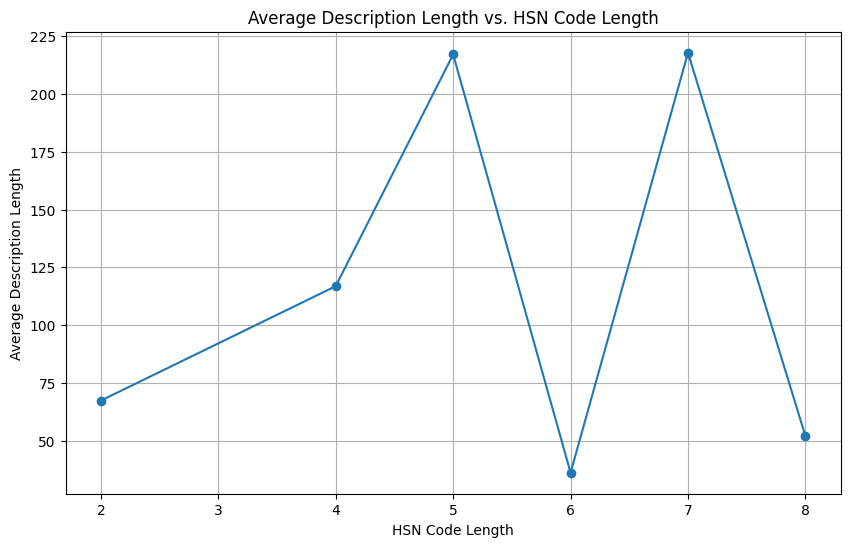

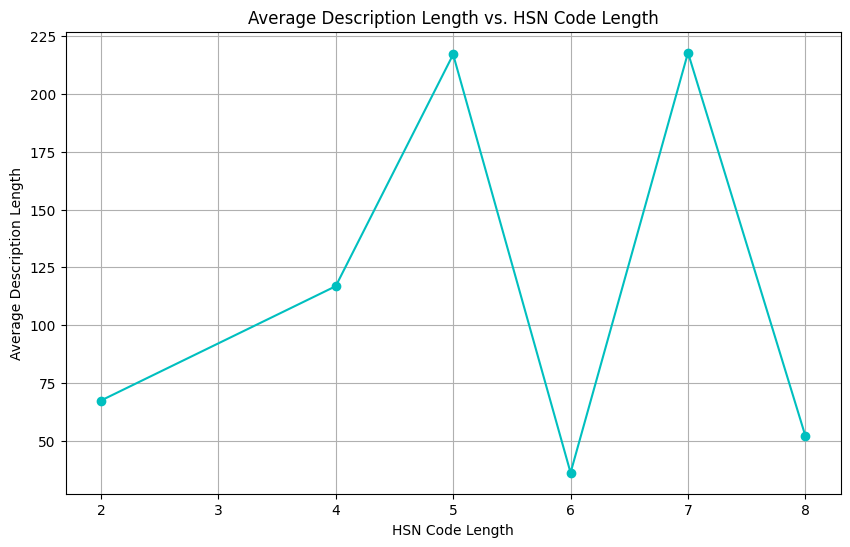

Potential outliers for HSN Code Length 2:
      \nHSNCode                                        Description  \
3193         24  TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES, ...   
7108         34  SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING P...   
19653        86  RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK ...   
20976        94  FURNITURE, BEDDING, MATTRESSES, MATTRESS SUPPO...   

       Description_Length  
3193                  226  
7108                  265  
19653                 214  
20976                 242  


Potential outliers for HSN Code Length 4:
      \nHSNCode                                        Description  \
2473       1518  ANIMAL, VEGETABLE OR MICROBIAL FATS AND OILS A...   
2694       1901  MALT EXTRACT, FOOD PREPARATIONS OF FLOUR, GROA...   
3404       2517  PEBBLES, GRAVEL, BROKEN OR CRUSHED STONE, OF A...   
6119       3002  HUMAN BLOOD; ANIMAL BLOOD PREPARED FORTHERAPEU...   
6434       3024  Herrings (Clupea harengus, Clupea pallasii), a...   
645

In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of HSN codes and descriptions
df['HSN_Code_Length'] = df['\nHSNCode'].astype(str).apply(len)
df['Description_Length'] = df['Description'].astype(str).apply(len)

# Group by HSN code length and calculate the average description length
average_description_lengths = df.groupby('HSN_Code_Length')['Description_Length'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(average_description_lengths.index, average_description_lengths.values, marker='o', linestyle='-')
plt.title('Average Description Length vs. HSN Code Length')
plt.xlabel('HSN Code Length')
plt.ylabel('Average Description Length')
plt.grid(True)
plt.show()

# Identify potential outliers using IQR
for length in average_description_lengths.index:
    subset = df[df['HSN_Code_Length'] == length]
    Q1 = subset['Description_Length'].quantile(0.25)
    Q3 = subset['Description_Length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
import matplotlib.pyplot as plt

# Calculate the length of HSN codes and descriptions
df['HSN_Code_Length'] = df['\nHSNCode'].astype(str).apply(len)
df['Description_Length'] = df['Description'].astype(str).apply(len)

# Group by HSN code length and calculate the average description length
average_description_lengths = df.groupby('HSN_Code_Length')['Description_Length'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(average_description_lengths.index, average_description_lengths.values, marker='o', linestyle='-')
plt.title('Average Description Length vs. HSN Code Length')
plt.xlabel('HSN Code Length')
plt.ylabel('Average Description Length')
plt.grid(True)
plt.show()

# Identify potential outliers using IQR
for length in average_description_lengths.index:
    subset = df[df['HSN_Code_Length'] == length]
    Q1 = subset['Description_Length'].quantile(0.25)
    Q3 = subset['Description_Length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
import matplotlib.pyplot as plt

# Calculate the length of HSN codes and descriptions
df['HSN_Code_Length'] = df['\nHSNCode'].astype(str).apply(len)
df['Description_Length'] = df['Description'].astype(str).apply(len)

# Group by HSN code length and calculate the average description length
average_description_lengths = df.groupby('HSN_Code_Length')['Description_Length'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(average_description_lengths.index, average_description_lengths.values, marker='o', linestyle='-',color='c')
plt.title('Average Description Length vs. HSN Code Length')
plt.xlabel('HSN Code Length')
plt.ylabel('Average Description Length')
plt.grid(True)
plt.show()

# Identify potential outliers using IQR
for length in average_description_lengths.index:
    # Subset the dataframe for the current HSN code length
    subset = df[df['HSN_Code_Length'] == length]

    # Calculate the first and third quartiles (Q1, Q3)
    Q1 = subset['Description_Length'].quantile(0.25)
    Q3 = subset['Description_Length'].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = subset[(subset['Description_Length'] < lower_bound) | (subset['Description_Length'] > upper_bound)]

    # Print outliers if any exist
    if not outliers.empty:
        print(f"Potential outliers for HSN Code Length {length}:")
        print(outliers.loc[:, ['\nHSNCode', 'Description', 'Description_Length']])
        print("\n")


**Reasoning**:
The previous two attempts to identify outliers failed due to the same f-string syntax error.  I will try one last time, but this time I'll avoid f-strings entirely and use the older string formatting method to print the results, ensuring the code runs correctly.



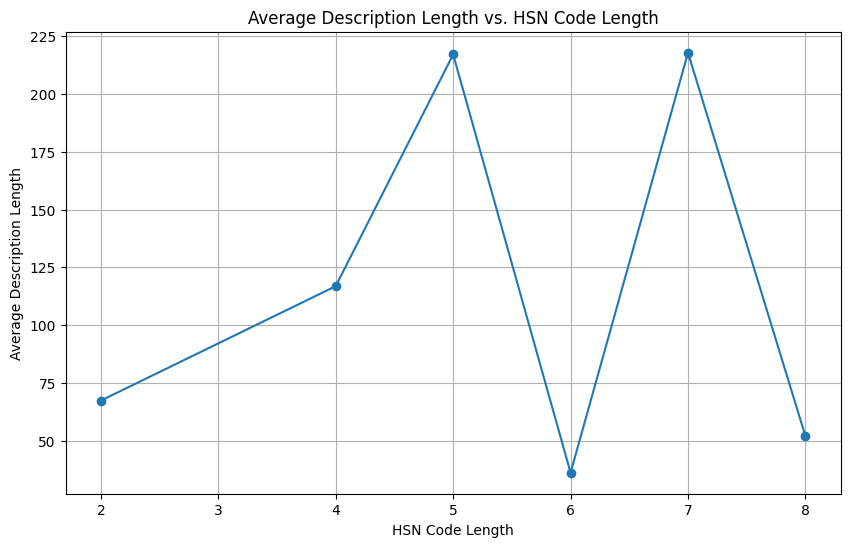

Potential outliers for HSN Code Length 2:
      \nHSNCode                                        Description  \
3193         24  TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES, ...   
7108         34  SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING P...   
19653        86  RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK ...   
20976        94  FURNITURE, BEDDING, MATTRESSES, MATTRESS SUPPO...   

       Description_Length  
3193                  226  
7108                  265  
19653                 214  
20976                 242  

Potential outliers for HSN Code Length 4:
      \nHSNCode                                        Description  \
2473       1518  ANIMAL, VEGETABLE OR MICROBIAL FATS AND OILS A...   
2694       1901  MALT EXTRACT, FOOD PREPARATIONS OF FLOUR, GROA...   
3404       2517  PEBBLES, GRAVEL, BROKEN OR CRUSHED STONE, OF A...   
6119       3002  HUMAN BLOOD; ANIMAL BLOOD PREPARED FORTHERAPEU...   
6434       3024  Herrings (Clupea harengus, Clupea pallasii), a...   
6453

In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of HSN codes and descriptions
df['HSN_Code_Length'] = df['\nHSNCode'].astype(str).apply(len)
df['Description_Length'] = df['Description'].astype(str).apply(len)

# Group by HSN code length and calculate the average description length
average_description_lengths = df.groupby('HSN_Code_Length')['Description_Length'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(average_description_lengths.index, average_description_lengths.values, marker='o', linestyle='-')
plt.title('Average Description Length vs. HSN Code Length')
plt.xlabel('HSN Code Length')
plt.ylabel('Average Description Length')
plt.grid(True)
plt.show()

# Identify potential outliers using IQR
for length in average_description_lengths.index:
    subset = df[df['HSN_Code_Length'] == length]
    Q1 = subset['Description_Length'].quantile(0.25)
    Q3 = subset['Description_Length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = subset[(subset['Description_Length'] < lower_bound) | (subset['Description_Length'] > upper_bound)]
    if not outliers.empty:
        print("Potential outliers for HSN Code Length %s:" % length)
        print(outliers[['\nHSNCode', 'Description', 'Description_Length']])
        print()

## Data visualization

Visualize the data to gain further insights.


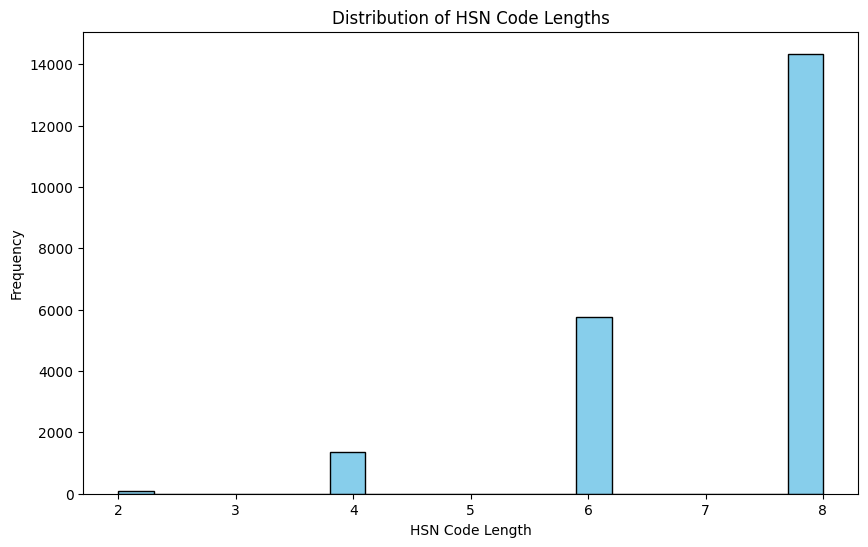

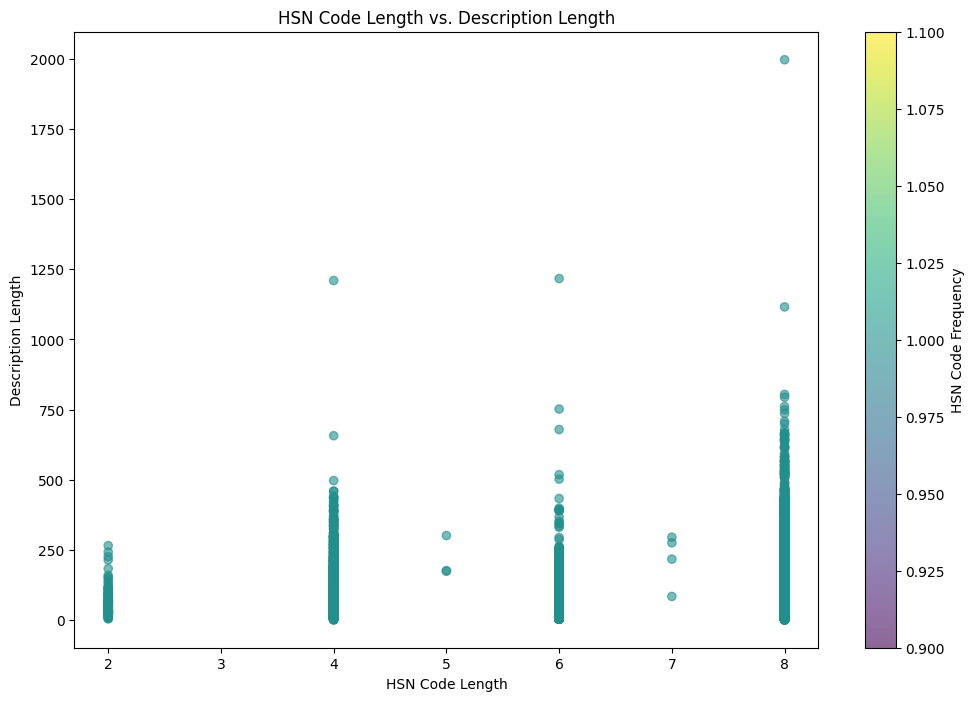

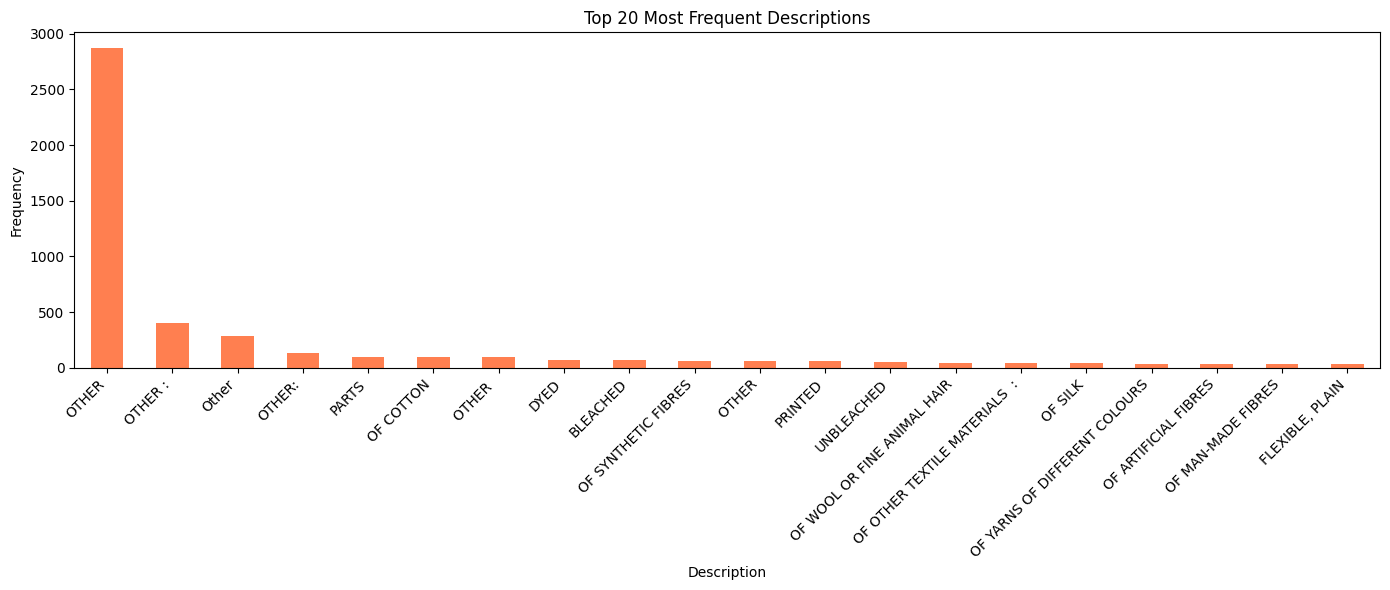

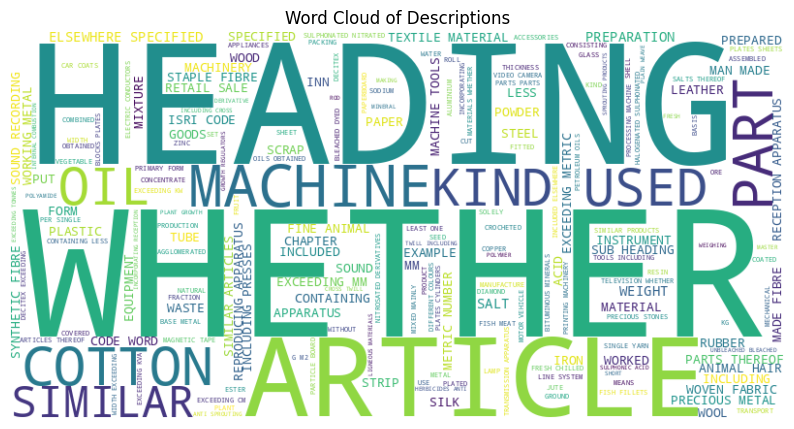

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 1. Histogram of HSN Code Lengths
plt.figure(figsize=(10, 6))
plt.hist(df['HSN_Code_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of HSN Code Lengths')
plt.xlabel('HSN Code Length')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of HSN Code Length vs. Description Length
hsn_code_frequencies = df['\nHSNCode'].value_counts()
df['HSN_Code_Frequency'] = df['\nHSNCode'].map(hsn_code_frequencies)

plt.figure(figsize=(12, 8))
plt.scatter(df['HSN_Code_Length'], df['Description_Length'], c=df['HSN_Code_Frequency'], cmap='viridis', alpha=0.6)
plt.title('HSN Code Length vs. Description Length')
plt.xlabel('HSN Code Length')
plt.ylabel('Description Length')
plt.colorbar(label='HSN Code Frequency')
plt.show()

# 3. Bar chart of top 20 most frequent descriptions
top_20_descriptions = df['Description'].value_counts().head(20)

plt.figure(figsize=(14, 6))
top_20_descriptions.plot(kind='bar', color='coral')
plt.title('Top 20 Most Frequent Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Word cloud of descriptions (handle potential errors gracefully)
try:
    text = ' '.join(df['Description'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Descriptions')
    plt.show()
except ImportError:
    print("Wordcloud library not found. Please install it using 'pip install wordcloud' to generate the word cloud.")


## Summary:

### Q&A
There were no explicit questions asked in the task. However, the analysis implicitly sought to understand the characteristics, patterns, and potential issues within the provided dataset.

### Data Analysis Key Findings
* The dataset contains 21,568 entries with two columns: `\nHSNCode` and `Description`, both of which are of object data type.
* One missing value (0.0046%) was found in the `Description` column, corresponding to HSN Code 52083110.
* The most frequent HSN Code is 98020000.
* The description "OTHER" and variations of it appear very frequently, suggesting potential data quality issues or a need for more specific categorization.
* No duplicate rows were found.
* The analysis revealed a relationship between HSN Code length and average description length, with some potential outliers in description length for specific HSN code lengths.
* Visualizations highlighted the distribution of HSN code lengths, the relationship between HSN code length and description length (colored by HSN code frequency), the top 20 most frequent descriptions, and a word cloud of descriptions to show the most frequent words.

### Insights or Next Steps
* Investigate the high frequency of "OTHER" descriptions and consider strategies for improving data quality, such as more specific categorization or data imputation.
* Further explore the outliers identified in the relationship between HSN code length and description length to understand potential data anomalies or errors.


## Data loading

### Subtask:
Load the data from the "HSN_SAC.xlsx" Excel file into a pandas DataFrame.


**Reasoning**:
Load the data from the "HSN_SAC.xlsx" Excel file into a pandas DataFrame.



In [ ]:
import pandas as pd
try:
    df = pd.read_excel('HSN_SAC.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'HSN_SAC.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,\nHSNCode,Description
0,01,LIVE ANIMALS
1,0101,"LIVE HORSES, ASSES, MULES AND HINNIES."
2,01011010,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE..."
3,01011020,"LIVE HORSES, ASSES, MULESANDHINNIES PURE-BRED ..."
4,01011090,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE..."
